# Ex1

Santiago Benites 54392

João Ferreira 55312

In [17]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import random

# Use as a time series a sinusoidal function with 100 periods and 50 points per period, with:

In [18]:
# Generate the sinusoidal data
num_periods = 100
points_per_period = 50
EPOCHS = 1000
total_points = num_periods * points_per_period
t = np.linspace(0, num_periods * 2 * np.pi, total_points)
sin_t = np.sin(t).reshape(-1, 1)

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)


y_train = sin_t[:train_split]
y_train = y_train.reshape(-1, points_per_period, 1)
x_train = t[:train_split].reshape(y_train.shape)

y_val = sin_t[train_split:]
y_val = y_val.reshape(-1, points_per_period, 1)
x_val = t[train_split:].reshape(y_val.shape)

# Split data into test set
start = int(total_points*0.5) #random.uniform(0, 1)
end = int(total_points*0.6)#random.uniform(start, 1)
y_test = sin_t[start:end]
y_test = y_test.reshape(-1, points_per_period, 1)
x_test = t[start:end].reshape(y_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(80, 50, 1)
(80, 50, 1)
(20, 50, 1)
(20, 50, 1)
(10, 50, 1)
(10, 50, 1)


## 1) no noise, clean.

In [19]:
# Define the model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

# Compile the model
model1.compile(optimizer='adam', loss='mse')

# Train the model
fit1 = model1.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)



Epoch 1/1000
3/3 [==============================] - 2s 192ms/step - loss: 0.5399 - val_loss: 0.5153
Epoch 2/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5233 - val_loss: 0.5108
Epoch 3/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5139 - val_loss: 0.5081
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5082 - val_loss: 0.5061
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5053 - val_loss: 0.5047
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.5030 - val_loss: 0.5038
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5007 - val_loss: 0.5031
Epoch 8/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4989 - val_loss: 0.5025
Epoch 9/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4976 - val_loss: 0.5017
Epoch 10/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4960 - val_loss: 0.5005
Epoch 11

## Testing the Model

Max value of loss is 0.5461462736129761
Max value of val_loss is 0.9478949308395386


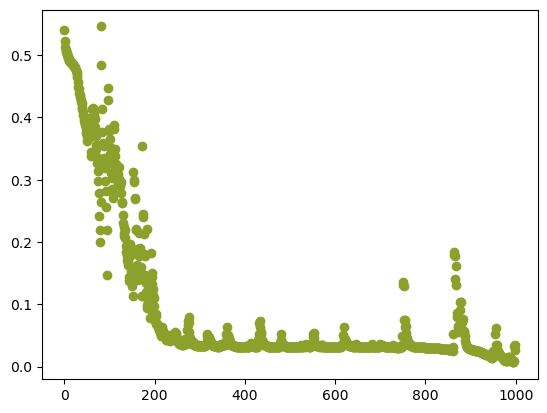

Input shape: (10, 50)
Output shape: (10, 50, 1)


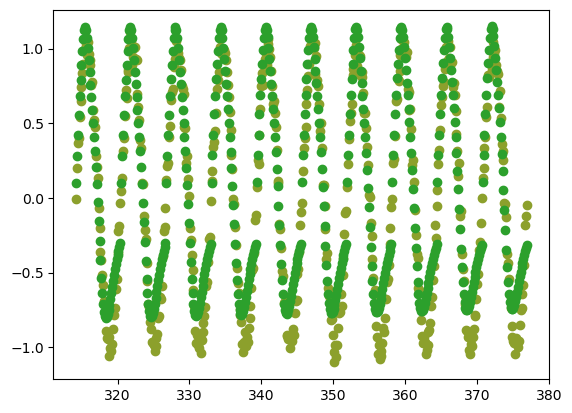

In [24]:
result = model1(x_test)

print(f"Max value of loss is { max(fit1.history['loss']) }")
print(f"Max value of val_loss is { max(fit1.history['val_loss']) }")

plt.scatter(range(0,EPOCHS), fit1.history['loss'], label='Outputs', c='#8ca02c')

plt.show()

print('Input shape:', x_test.shape)
print('Output shape:', result.shape)

x_test = x_test.squeeze()

plt.scatter(x_test, y_test, label='Outputs', c='#8ca02c')
plt.scatter(x_test, result , label='Labels', c='#2ca02c')


plt.show()

## ii) with noise by adding a Gaussian N (0, 0.05).

In [21]:
# Generate the sinusoidal data
num_periods = 100
points_per_period = 50
total_points = num_periods * points_per_period
t = np.linspace(0, num_periods * 2 * np.pi, total_points)
sin_t = np.sin(t).reshape(-1, 1)

values_to_add = np.random.normal(0, 0.05, size=(5000,1))
sin_t = sin_t + values_to_add.reshape(5000, 1)

# Split the data into training and validation sets
split_fraction = 0.8
train_split = int(split_fraction * total_points)


y_train = sin_t[:train_split]
y_train = y_train.reshape(-1, points_per_period, 1)
x_train = t[:train_split].reshape(y_train.shape)

y_val = sin_t[train_split:]
y_val = y_val.reshape(-1, points_per_period, 1)
x_val = t[train_split:].reshape(y_val.shape)

# Split data into test set
start = int(total_points*0.5) #random.uniform(0, 1)
end = int(total_points*0.6)#random.uniform(start, 1)
y_test = sin_t[start:end]
y_test = y_test.reshape(-1, points_per_period, 1)
x_test = t[start:end].reshape(y_test.shape)

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(80, 50, 1)
(80, 50, 1)
(20, 50, 1)
(20, 50, 1)
(10, 50, 1)
(10, 50, 1)


In [22]:
# Define the model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.GaussianNoise(0, 0.05),
    tf.keras.layers.Dense(1)
])

# Compile the model
model2.compile(optimizer='adam', loss='mse')


# Train the model
fit2 = model2.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_val, y_val),
    epochs=EPOCHS
)



Epoch 1/1000
3/3 [==============================] - 2s 195ms/step - loss: 0.5552 - val_loss: 0.5184
Epoch 2/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5171 - val_loss: 0.5045
Epoch 3/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.5008 - val_loss: 0.5056
Epoch 4/1000
3/3 [==============================] - 0s 32ms/step - loss: 0.4979 - val_loss: 0.5100
Epoch 5/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4984 - val_loss: 0.5087
Epoch 6/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4970 - val_loss: 0.5065
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4942 - val_loss: 0.5055
Epoch 8/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.4920 - val_loss: 0.5051
Epoch 9/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4906 - val_loss: 0.5048
Epoch 10/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.4892 - val_loss: 0.5046
Epoch 11

## Testing the model

Max value of loss is 0.8420050740242004
Max value of val_loss is 2.1495676040649414


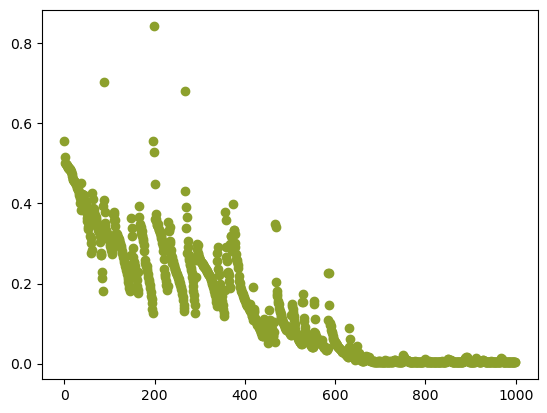

Input shape: (10, 50)
Output shape: (10, 50, 1)


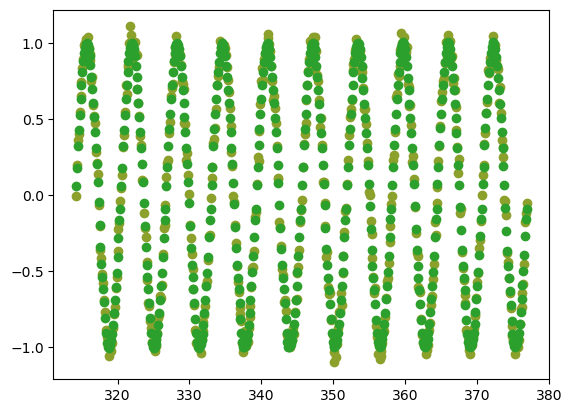

In [26]:
result = model2(x_test)

print(f"Max value of loss is { max(fit2.history['loss']) }")
print(f"Max value of val_loss is { max(fit2.history['val_loss']) }")

plt.scatter(range(0,EPOCHS), fit2.history['loss'], label='Outputs', c='#8ca02c')

plt.show()

print('Input shape:', x_test.shape)
print('Output shape:', result.shape)

x_test = x_test.squeeze()

plt.scatter(x_test, y_test, label='Outputs', c='#8ca02c')
plt.scatter(x_test, result , label='Labels', c='#2ca02c')


plt.show()